In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import utils

%config InlineBackend.figure_format = 'retina'

In [2]:
zachary = pd.read_csv("out.ucidata-zachary", sep=" ")
basic_graph = nx.Graph()
basic_graph.add_edges_from([(0,2),(0,3),(1,3),(2,3)])

gamma_graph_low = nx.Graph()
gamma_graph_low.add_edges_from([(0,1),(0,2),(0,3),(0,4),(0,5),(0,6),(1,6),(4,5),(2,3)])

gamma_graph_high = nx.Graph()
gamma_graph_high.add_edges_from([(0,1),(0,2),(0,3),(0,4),(0,5),(0,6),(2,3),(2,4),(3,4)])

barbell_graph = nx.Graph()
barbell_graph.add_edges_from([(0,1),(0,2),(0,3),(0,4),(1,2),(1,3),(2,3),(4, 5),(4,6),(4,7),(5,6),(5,7),(6,7)])

zachary_1 = [17, 6, 11, 7, 5, 12, 18, 1, 13, 22, 4, 8, 14, 2, 3, 9, 20]

In [18]:
def draw_subgraph(G, ax=None, pos=None, save=False, fname=None):
    colors = list(map(lambda node: 1 if node in [0, 6] else 0, G.nodes))
    if not ax:
        fig, ax = plt.subplots(figsize=(15,10))
        pos=nx.spring_layout(G)
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
    nx.draw_networkx(G, pos=pos, ax=ax, with_labels=True, cmap=plt.get_cmap('summer'), node_color=colors, node_size=1000, font_size=15, width=1)
    
    if save:
        fig.savefig('img/{}.png'.format(fname), bbox_inches='tight')

In [19]:
zachary_graph = nx.from_pandas_edgelist(zachary, '1', '2')

In [20]:
#fig = draw_subgraph(zachary_graph)
#fig.savefig('zachary.png')

In [21]:
def compare_graphs(graphs, save=False, fname=None):
    fig, ax = plt.subplots(1, len(graphs), figsize=(20, 15))
        
    for i, graph in enumerate(graphs):
        current_ax = ax[i]
        current_ax.xaxis.set_visible(False)
        current_ax.yaxis.set_visible(False)
        current_pos = nx.spring_layout(graph)
        draw_subgraph(graph,ax=current_ax, pos=current_pos)
    
    if save:
        fig.savefig('img/{}.png'.format(fname), bbox_inches='tight')

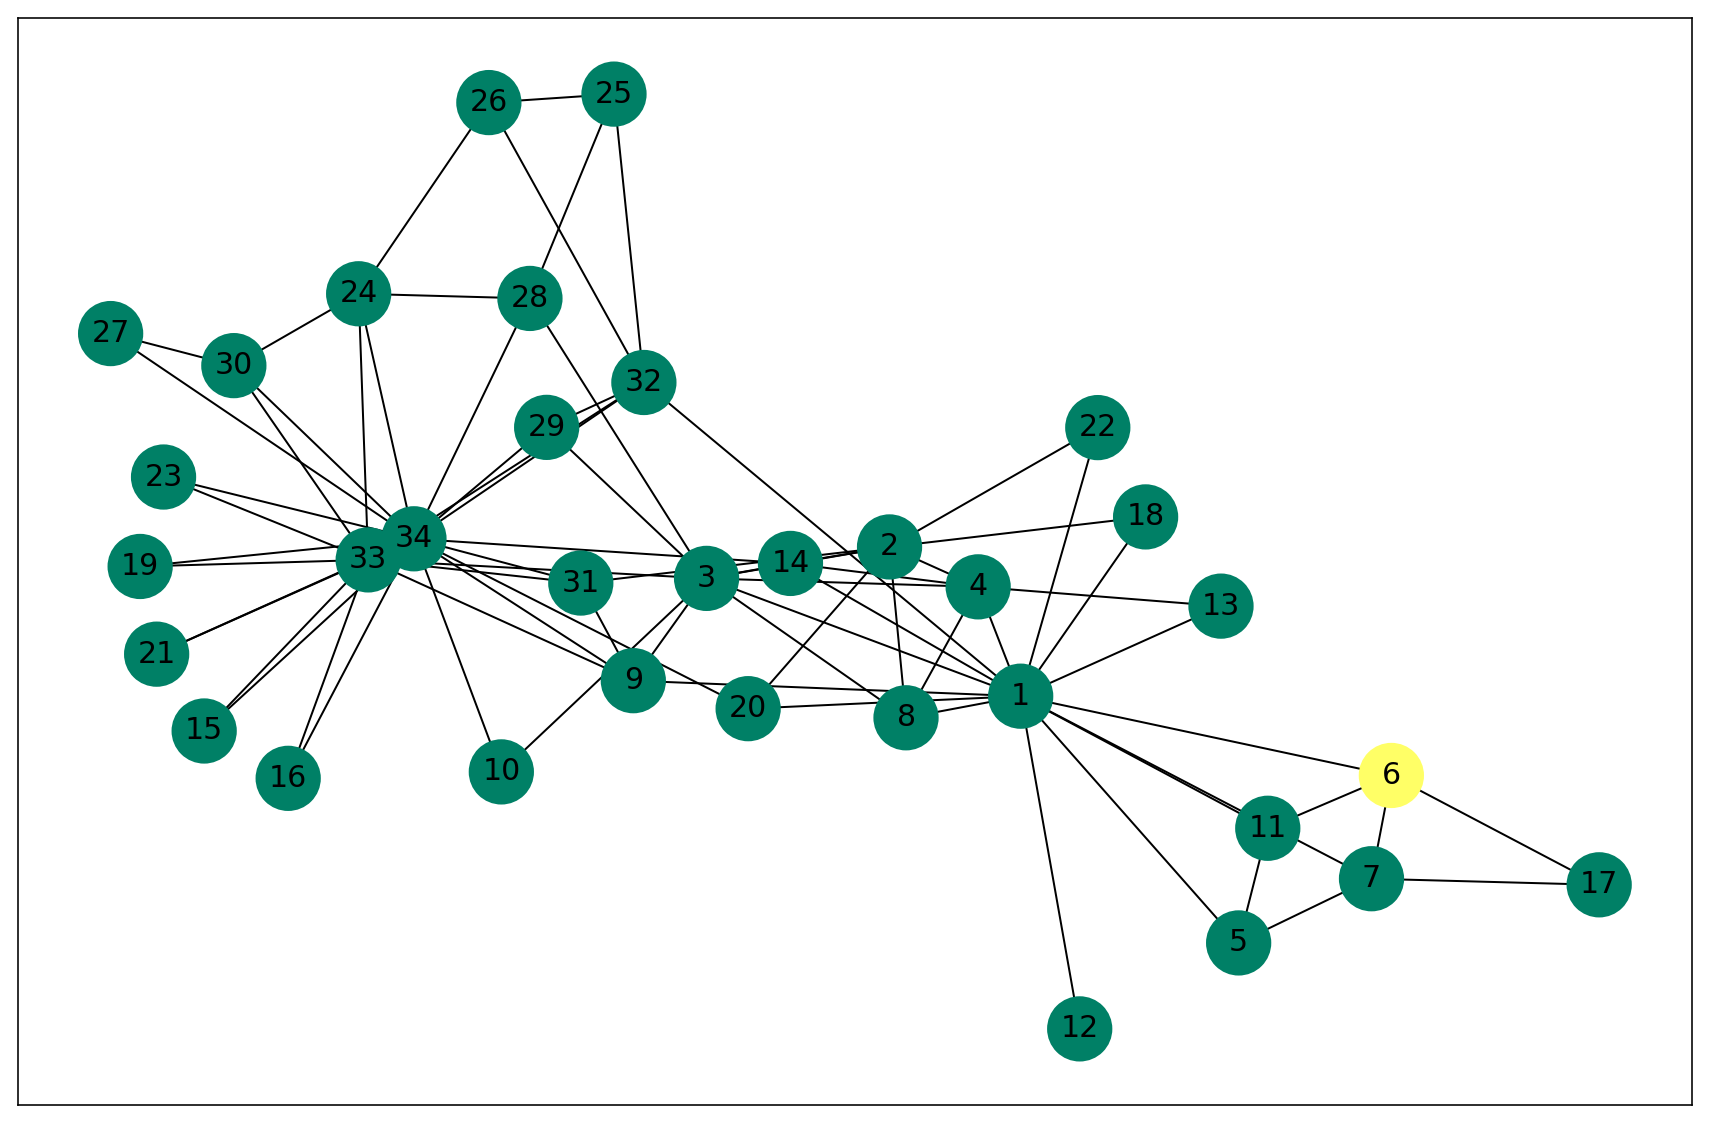

In [22]:
#compare_graphs([gamma_graph_high, gamma_graph_low], save=True, fname='gamma_comparison')
draw_subgraph(zachary_graph, save=True, fname='zachary')

In [23]:
G_gamma_cctest = nx.Graph()
G_gamma_cctest.add_edges_from([(0, 1),(0, 2),(0, 3),(0, 4),(0, 5),(0, 6),(1, 2),(1, 3),(2, 4),(2, 5),(3, 4),(4, 5),(6, 7),(6, 8),(6, 9),(6, 10),(6, 11),(7, 8),(9, 10)])

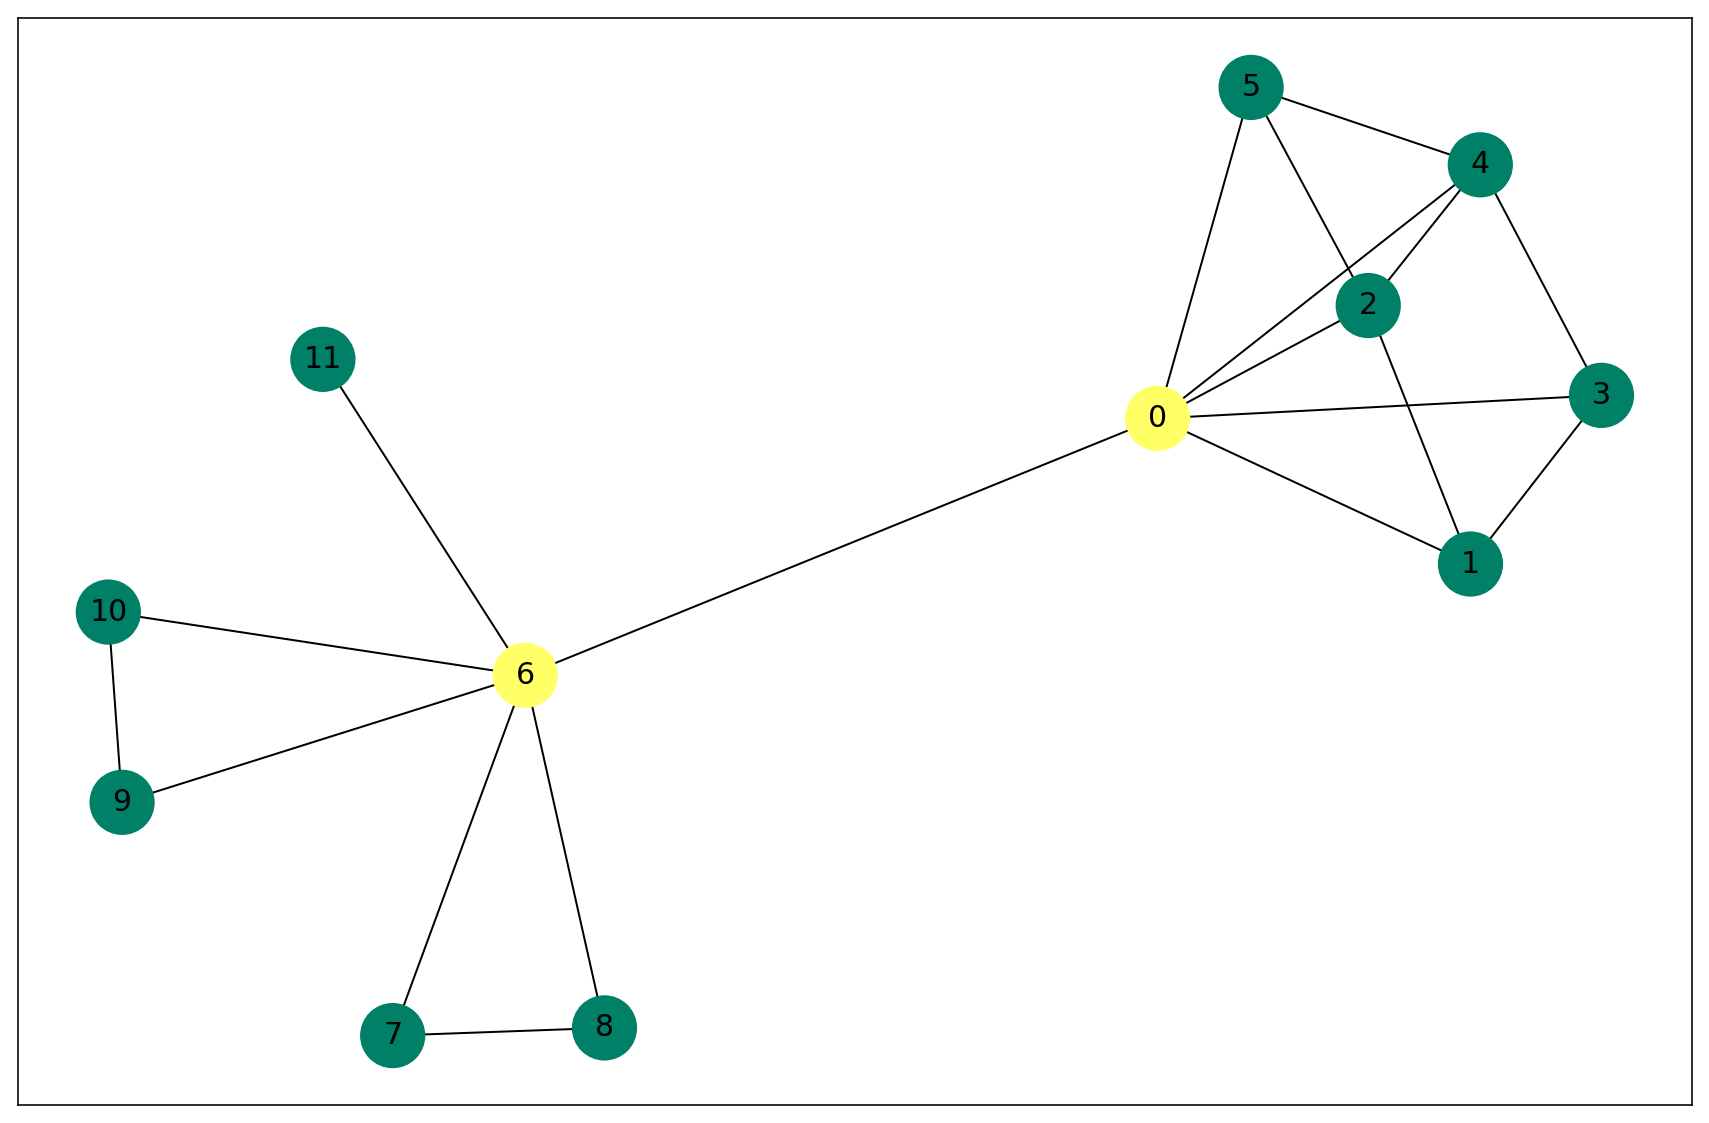

In [24]:
draw_subgraph(G_gamma_cctest, save=True, fname='cc_gamma_test')